# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
       city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_date = city_weather["dt"]

        # Append the City information into city_data list
       city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | polyarnyy
Processing Record 2 of Set 1 | al majaridah
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | savave village
City not found. Skipping...
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | cidade velha
Processing Record 9 of Set 1 | koryazhma
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | akureyri
Processing Record 15 of Set 1 | shiloh
Processing Record 16 of Set 1 | benguela
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | ixtapa
Processing Record 20 of Set 1 | anadyr
Processing Record 21 of Set 1 | bethel
Proc

In [69]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [70]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,polyarnyy,69.1989,33.4478,15.70,64,16,11.69,RU,1720336334
1,al majaridah,19.1236,41.9111,37.11,19,100,2.80,SA,1720336334
2,bredasdorp,-34.5322,20.0403,10.68,79,23,5.47,ZA,1720336334
3,bilibino,68.0546,166.4372,7.91,88,100,1.93,RU,1720336334
4,port-aux-francais,-49.3500,70.2167,0.82,74,73,12.27,TF,1720336335


In [71]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [72]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,polyarnyy,69.1989,33.4478,15.70,64,16,11.69,RU,1720336334
1,al majaridah,19.1236,41.9111,37.11,19,100,2.80,SA,1720336334
2,bredasdorp,-34.5322,20.0403,10.68,79,23,5.47,ZA,1720336334
3,bilibino,68.0546,166.4372,7.91,88,100,1.93,RU,1720336334
4,port-aux-francais,-49.3500,70.2167,0.82,74,73,12.27,TF,1720336335


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

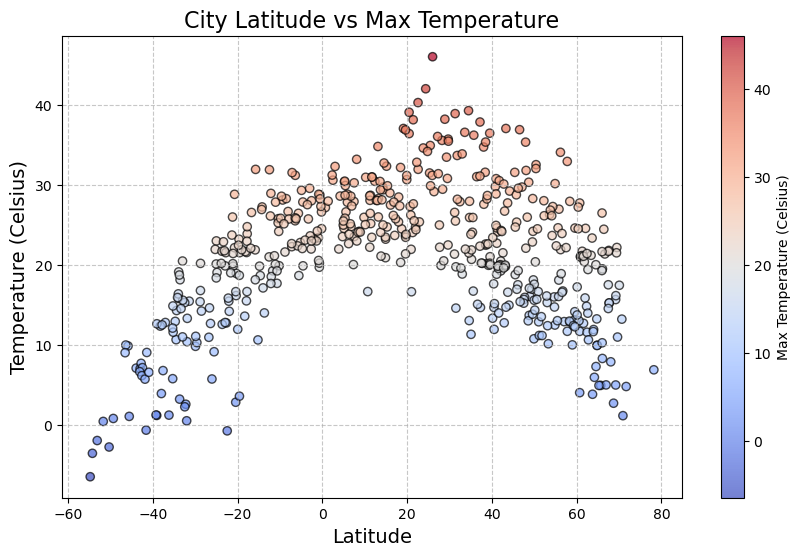

In [73]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='k', alpha=0.7, c=city_data_df['Max Temp'], cmap='coolwarm')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Max Temperature", fontsize=16)
plt.ylabel("Temperature (Celsius)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.colorbar(label='Max Temperature (Celsius)')
plt.grid(True, linestyle='--', alpha=0.7)

# Save the figure
# plt.savefig("output_data/Fig1.png")
plt.savefig("output_data/Fig1.png", bbox_inches='tight')

# Show plot
plt.show()

#### Latitude Vs. Humidity

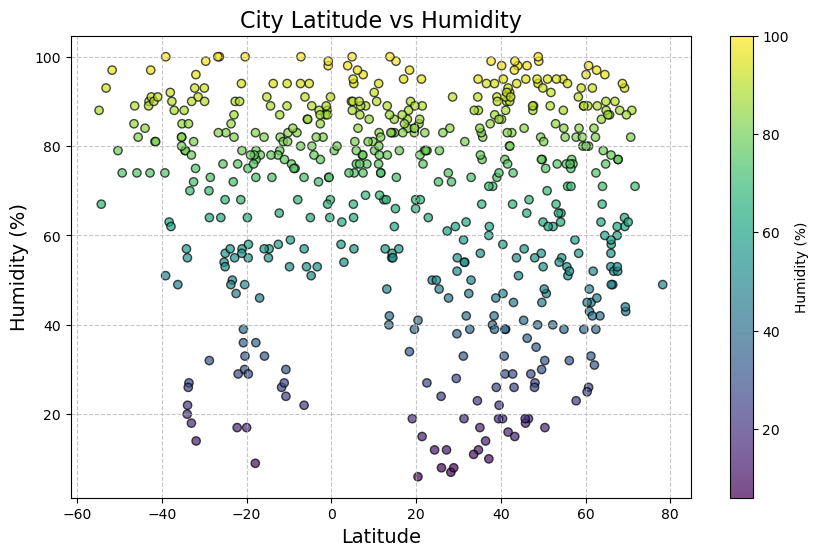

In [74]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='k', alpha=0.7, c=city_data_df['Humidity'], cmap='viridis')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Humidity", fontsize=16)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.colorbar(label='Humidity (%)')
plt.grid(True, linestyle='--', alpha=0.7)


# Save the figure
plt.savefig("output_data/Fig2.png", bbox_inches='tight')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

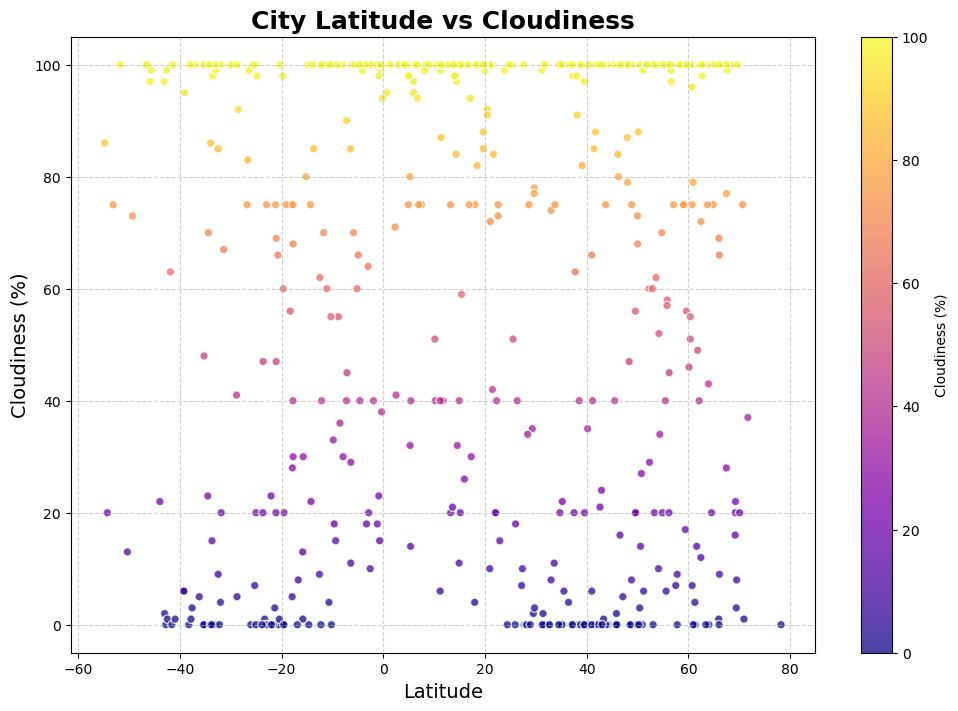

In [75]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.figure(figsize=(12, 8))
scatter = plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], 
                      marker='o', edgecolors='w', alpha=0.75, 
                      c=city_data_df['Cloudiness'], cmap='plasma')


# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Latitude vs Cloudiness", fontsize=18, fontweight='bold')
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.colorbar(scatter, label='Cloudiness (%)', orientation='vertical')
plt.grid(True, linestyle='--', alpha=0.6)

# Save the figure
plt.savefig("output_data/Fig3.png", bbox_inches='tight')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

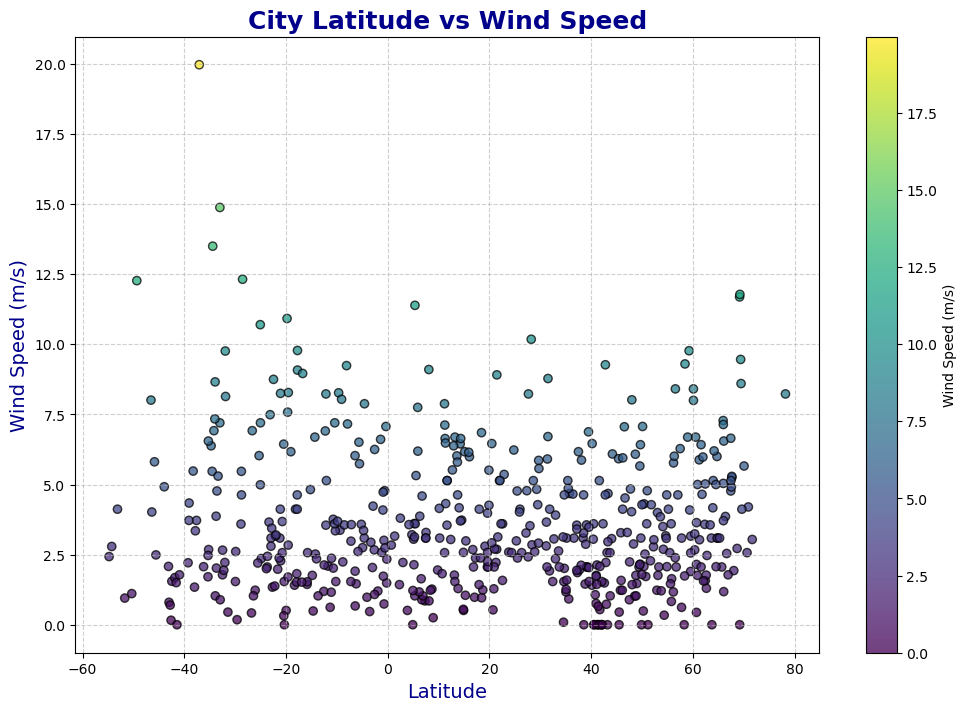

In [76]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.figure(figsize=(12, 8))
scatter = plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], 
                      marker='o', edgecolors='k', alpha=0.75, 
                      c=city_data_df['Wind Speed'], cmap='viridis')


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Wind Speed", fontsize=18, fontweight='bold', color='darkblue')
plt.ylabel("Wind Speed (m/s)", fontsize=14, color='darkblue')
plt.xlabel("Latitude", fontsize=14, color='darkblue')
plt.colorbar(scatter, label='Wind Speed (m/s)', orientation='vertical')
plt.grid(True, linestyle='--', alpha=0.6)


# Save the figure
plt.savefig("output_data/Fig3.png", bbox_inches='tight')

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


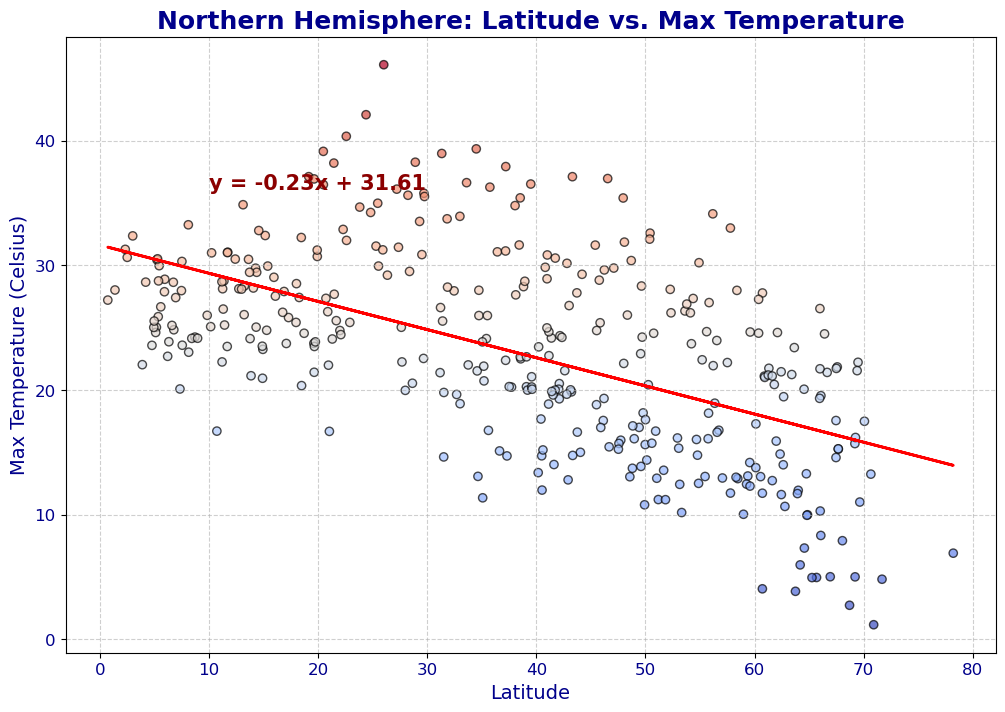

The r-value is: -0.56


In [77]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# Show only the Northern Hemisphere's temperature vs. latitude; we need to filter the dataset to include only those entries with positive latitudes.
# Linear regression scatter plot for Northern Hemisphere: Temperature (C) vs. Latitude 
# Filter the data for the Northern Hemisphere

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotation_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.figure(figsize=(12, 8))
    plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7, c=y_values, cmap='coolwarm', marker='o')
    plt.plot(x_values, regress_values, "r-", linewidth=2)
    plt.annotate(line_eq, annotation_coords, fontsize=15, color="darkred", fontweight='bold')

    plt.title(title, fontsize=18, fontweight='bold', color='darkblue')
    plt.xlabel(x_label, fontsize=14, color='darkblue')
    plt.ylabel(y_label, fontsize=14, color='darkblue')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Enhance plot aesthetics
    plt.xticks(fontsize=12, color='darkblue')
    plt.yticks(fontsize=12, color='darkblue')

    # Show plot
    plt.show()
    
    print(f"The r-value is: {rvalue:.2f}")

# Define the data for the plot using the Northern Hemisphere data
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function to create the plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temperature (Celsius)', 'Northern Hemisphere: Latitude vs. Max Temperature', (10, northern_hemi_df['Max Temp'].max() - 10))



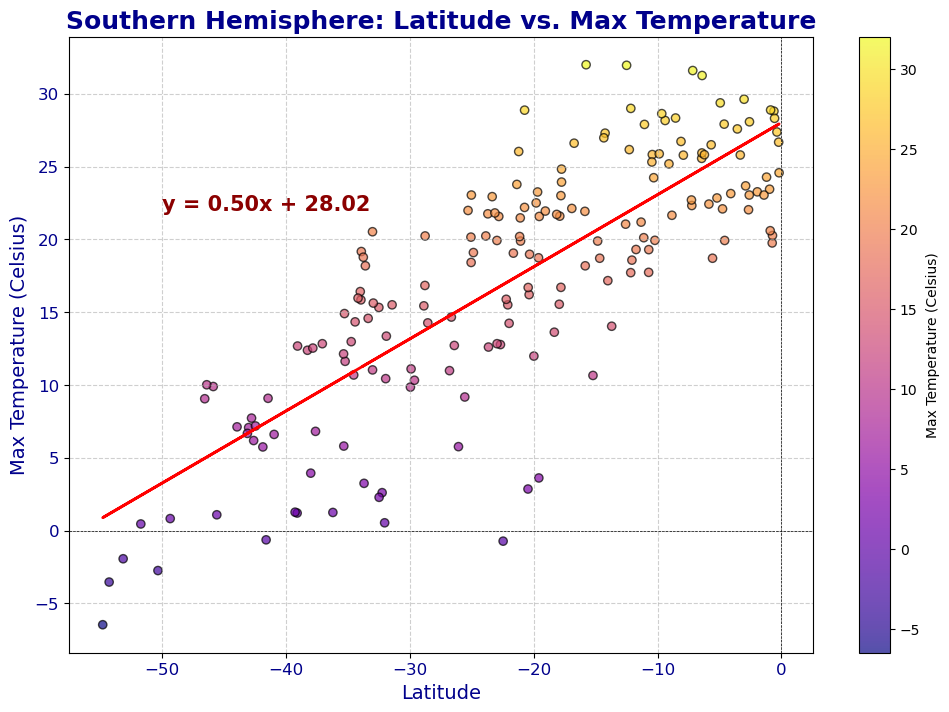

The r-value is: 0.81


In [78]:
# Linear regression scatter plot for Southern Hemisphere: Temperature (C) vs. Latitude
# Show only the Southern Hemisphere's temperature vs. latitude; we need to filter the dataset to include only those entries with Negative latitudes.
# Linear regression scatter plot for Southern Hemisphere: Temperature (C) vs. Latitude 
# Filter the data for the Northern Hemisphere

# Filter the data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotation_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.figure(figsize=(12, 8))
    plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7, c=y_values, cmap='plasma', marker='o')
    plt.plot(x_values, regress_values, "r-", linewidth=2)
    plt.annotate(line_eq, annotation_coords, fontsize=15, color="darkred", fontweight='bold')

    plt.title(title, fontsize=18, fontweight='bold', color='darkblue')
    plt.xlabel(x_label, fontsize=14, color='darkblue')
    plt.ylabel(y_label, fontsize=14, color='darkblue')
    plt.colorbar(label=y_label)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Enhance plot aesthetics
    plt.xticks(fontsize=12, color='darkblue')
    plt.yticks(fontsize=12, color='darkblue')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

    # Show plot
    plt.show()
    
    print(f"The r-value is: {rvalue:.2f}")

# Define the data for the plot using the Southern Hemisphere data
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function to create the plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temperature (Celsius)', 'Southern Hemisphere: Latitude vs. Max Temperature', (-50, southern_hemi_df['Max Temp'].max() - 10))


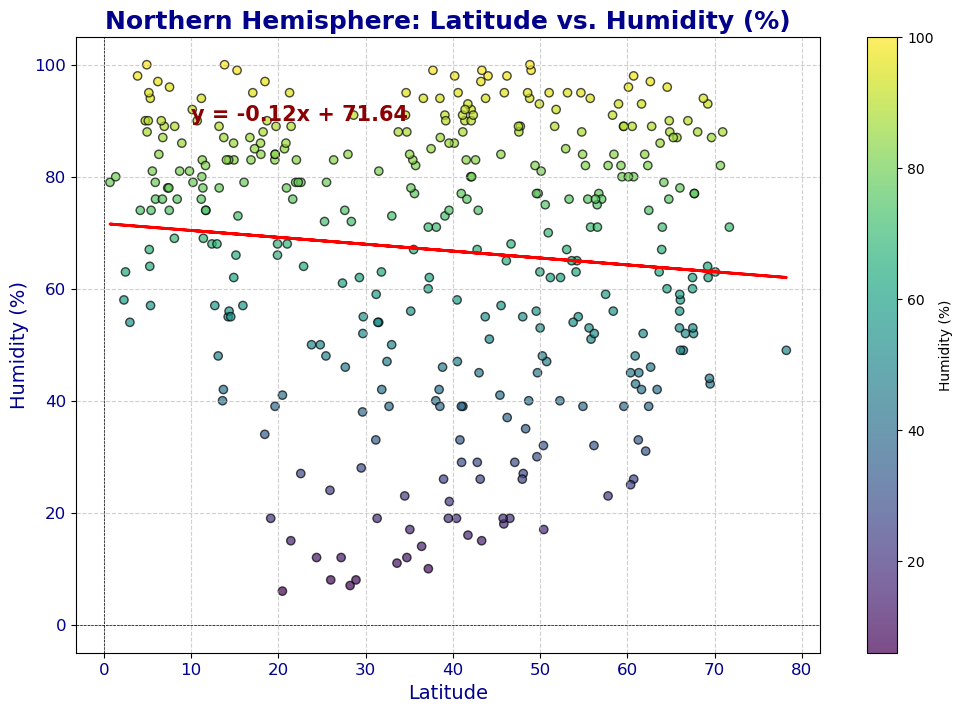

The r-value is: -0.10


In [79]:
# Linear regression scatter plot for Northern Hemisphere: Humidity (%) vs. Latitude 

# Filter the data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotation_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7, c=y_values, cmap='viridis', marker='o')
    plt.plot(x_values, regress_values, "r-", linewidth=2)
    plt.annotate(line_eq, annotation_coords, fontsize=15, color="darkred", fontweight='bold')

    plt.title(title, fontsize=18, fontweight='bold', color='darkblue')
    plt.xlabel(x_label, fontsize=14, color='darkblue')
    plt.ylabel(y_label, fontsize=14, color='darkblue')
    plt.colorbar(scatter, label=y_label)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Enhance plot aesthetics
    plt.xticks(fontsize=12, color='darkblue')
    plt.yticks(fontsize=12, color='darkblue')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

    # Save the figure
    plt.savefig("output_data/Fig4.png", bbox_inches='tight')

    # Show plot
    plt.show()
    
    print(f"The r-value is: {rvalue:.2f}")

# Define the data for the plot using the Northern Hemisphere data
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function to create the plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity (%)', 'Northern Hemisphere: Latitude vs. Humidity (%)', (10, northern_hemi_df['Humidity'].max() - 10))


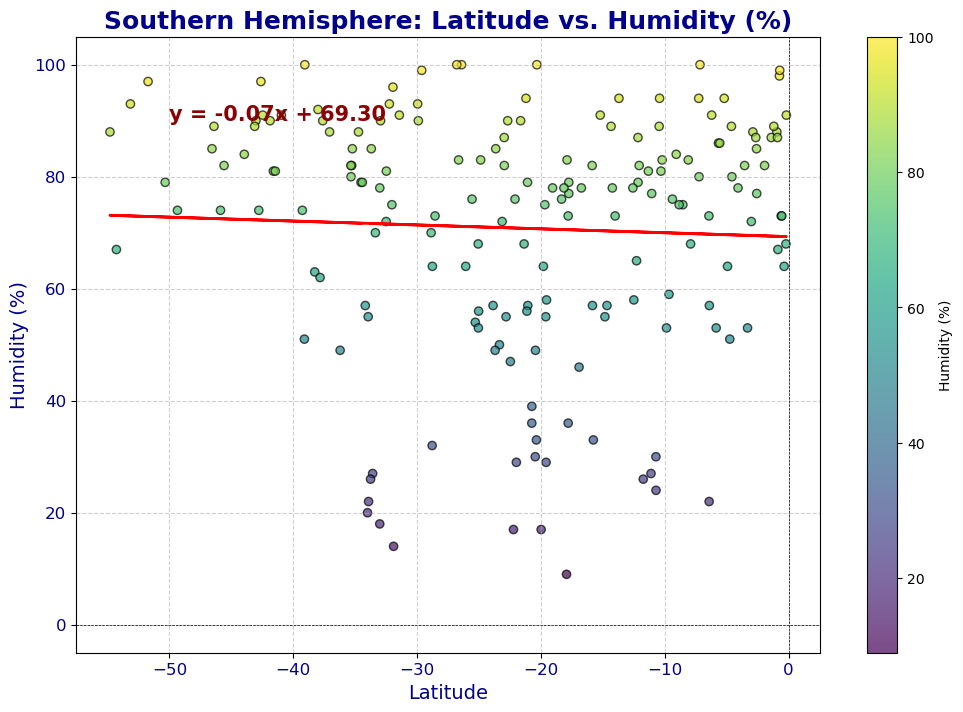

The r-value is: -0.04


In [80]:
# Linear regression scatter plot for Southern Hemisphere: Humidity (%) vs. Latitude 

# Filter the data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotation_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7, c=y_values, cmap='viridis', marker='o')
    plt.plot(x_values, regress_values, "r-", linewidth=2)
    plt.annotate(line_eq, annotation_coords, fontsize=15, color="darkred", fontweight='bold')

    plt.title(title, fontsize=18, fontweight='bold', color='darkblue')
    plt.xlabel(x_label, fontsize=14, color='darkblue')
    plt.ylabel(y_label, fontsize=14, color='darkblue')
    plt.colorbar(scatter, label=y_label)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Enhance plot aesthetics
    plt.xticks(fontsize=12, color='darkblue')
    plt.yticks(fontsize=12, color='darkblue')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

    # Save the figure
    plt.savefig("output_data/Fig5.png", bbox_inches='tight')

    # Show plot
    plt.show()
    
    print(f"The r-value is: {rvalue:.2f}")

# Define the data for the plot using the Southern Hemisphere data
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function to create the plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity (%)', 'Southern Hemisphere: Latitude vs. Humidity (%)', (-50, southern_hemi_df['Humidity'].max() - 10))


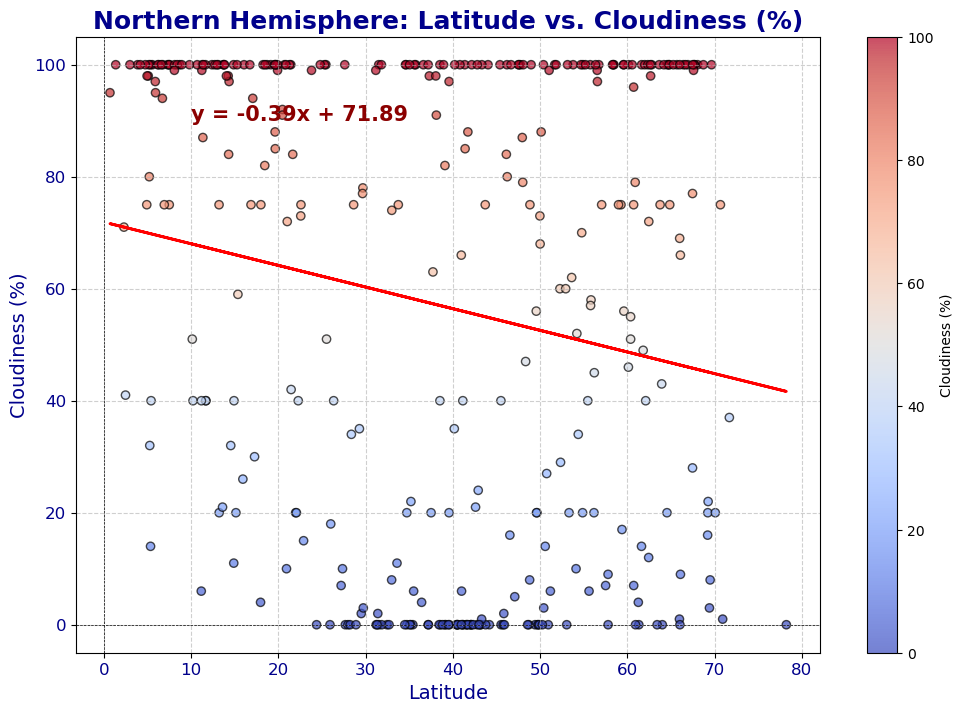

The r-value is: -0.18


In [81]:
#Linear regression scatter plot for Northern Hemisphere: Cloudiness (%) vs. Latitude

# Filter the data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotation_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7, c=y_values, cmap='coolwarm', marker='o')
    plt.plot(x_values, regress_values, "r-", linewidth=2)
    plt.annotate(line_eq, annotation_coords, fontsize=15, color="darkred", fontweight='bold')

    plt.title(title, fontsize=18, fontweight='bold', color='darkblue')
    plt.xlabel(x_label, fontsize=14, color='darkblue')
    plt.ylabel(y_label, fontsize=14, color='darkblue')
    plt.colorbar(scatter, label=y_label)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Enhance plot aesthetics
    plt.xticks(fontsize=12, color='darkblue')
    plt.yticks(fontsize=12, color='darkblue')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

    # Save the figure
    plt.savefig("output_data/Fig6.png", bbox_inches='tight')

    # Show plot
    plt.show()
    
    print(f"The r-value is: {rvalue:.2f}")

# Define the data for the plot using the Northern Hemisphere data
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function to create the plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Cloudiness (%)', 'Northern Hemisphere: Latitude vs. Cloudiness (%)', (10, northern_hemi_df['Cloudiness'].max() - 10))


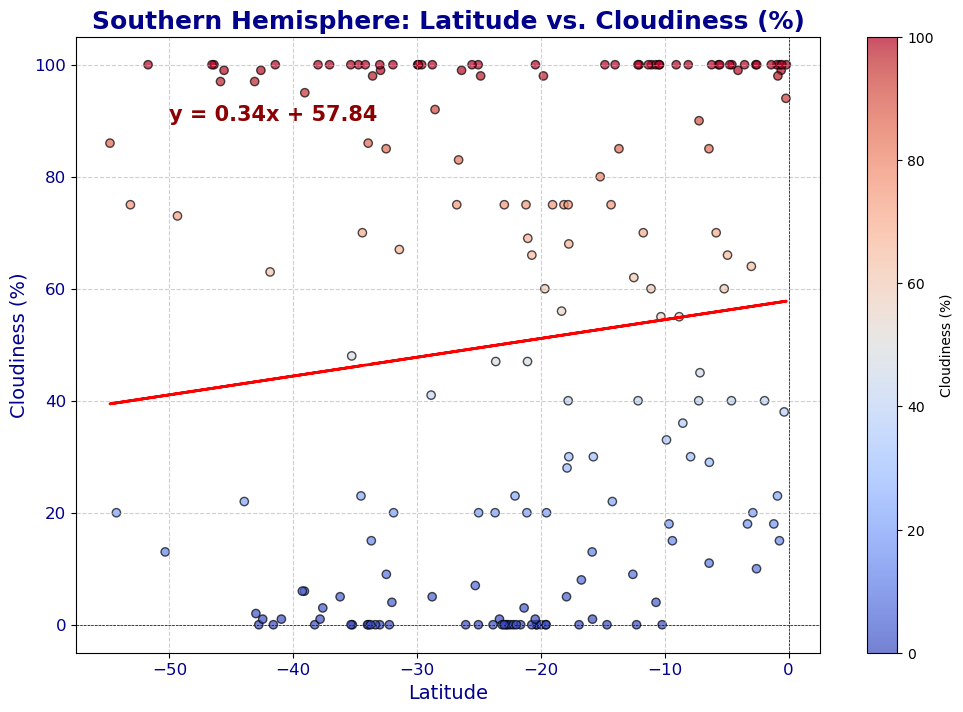

The r-value is: 0.11


In [82]:
# Linear regression scatter plot for Southern Hemisphere: Cloudiness (%) vs. Latitude

# Filter the data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotation_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7, c=y_values, cmap='coolwarm', marker='o')
    plt.plot(x_values, regress_values, "r-", linewidth=2)
    plt.annotate(line_eq, annotation_coords, fontsize=15, color="darkred", fontweight='bold')

    plt.title(title, fontsize=18, fontweight='bold', color='darkblue')
    plt.xlabel(x_label, fontsize=14, color='darkblue')
    plt.ylabel(y_label, fontsize=14, color='darkblue')
    plt.colorbar(scatter, label=y_label)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Enhance plot aesthetics
    plt.xticks(fontsize=12, color='darkblue')
    plt.yticks(fontsize=12, color='darkblue')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

    # Save the figure
    plt.savefig("output_data/Fig7.png", bbox_inches='tight')

    # Show plot
    plt.show()
    
    print(f"The r-value is: {rvalue:.2f}")

# Define the data for the plot using the Southern Hemisphere data
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function to create the plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Cloudiness (%)', 'Southern Hemisphere: Latitude vs. Cloudiness (%)', (-50, southern_hemi_df['Cloudiness'].max() - 10))


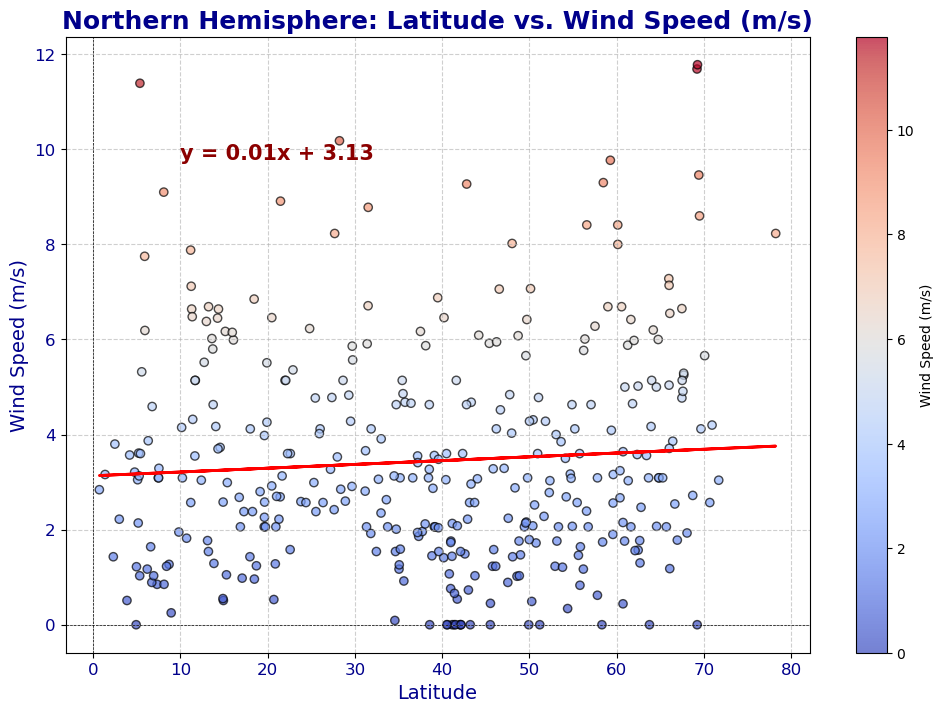

The r-value is: 0.07


In [83]:
# Linear regression scatter plot for Northern Hemisphere: Wind Speed (m/s) vs. Latitude 


# Filter the data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotation_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7, c=y_values, cmap='coolwarm', marker='o')
    plt.plot(x_values, regress_values, "r-", linewidth=2)
    plt.annotate(line_eq, annotation_coords, fontsize=15, color="darkred", fontweight='bold')

    plt.title(title, fontsize=18, fontweight='bold', color='darkblue')
    plt.xlabel(x_label, fontsize=14, color='darkblue')
    plt.ylabel(y_label, fontsize=14, color='darkblue')
    plt.colorbar(scatter, label=y_label)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Enhance plot aesthetics
    plt.xticks(fontsize=12, color='darkblue')
    plt.yticks(fontsize=12, color='darkblue')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

    # Save the figure
    plt.savefig("output_data/Fig8.png", bbox_inches='tight')

    # Show plot
    plt.show()
    
    print(f"The r-value is: {rvalue:.2f}")

# Define the data for the plot using the Northern Hemisphere data
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function to create the plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed (m/s)', 'Northern Hemisphere: Latitude vs. Wind Speed (m/s)', (10, northern_hemi_df['Wind Speed'].max() - 2))


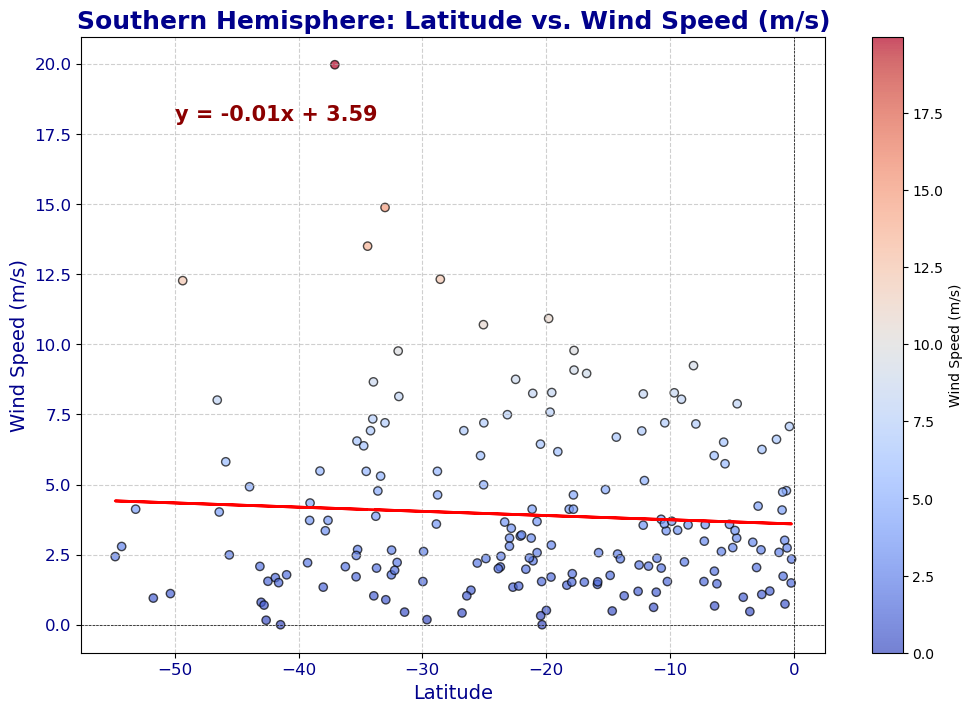

The r-value is: -0.07


In [84]:
# Linear regression scatter plot for Southern Hemisphere: Wind Speed (m/s) vs. Latitude

# Filter the data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotation_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7, c=y_values, cmap='coolwarm', marker='o')
    plt.plot(x_values, regress_values, "r-", linewidth=2)
    plt.annotate(line_eq, annotation_coords, fontsize=15, color="darkred", fontweight='bold')

    plt.title(title, fontsize=18, fontweight='bold', color='darkblue')
    plt.xlabel(x_label, fontsize=14, color='darkblue')
    plt.ylabel(y_label, fontsize=14, color='darkblue')
    plt.colorbar(scatter, label=y_label)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Enhance plot aesthetics
    plt.xticks(fontsize=12, color='darkblue')
    plt.yticks(fontsize=12, color='darkblue')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

    # Save the figure
    plt.savefig("output_data/Fig9.png", bbox_inches='tight')

    # Show plot
    plt.show()
    
    print(f"The r-value is: {rvalue:.2f}")

# Define the data for the plot using the Southern Hemisphere data
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function to create the plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed (m/s)', 'Southern Hemisphere: Latitude vs. Wind Speed (m/s)', (-50, southern_hemi_df['Wind Speed'].max() - 2))



In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,polyarnyy,69.1989,33.4478,15.70,64,16,11.69,RU,1720336334
1,al majaridah,19.1236,41.9111,37.11,19,100,2.80,SA,1720336334
3,bilibino,68.0546,166.4372,7.91,88,100,1.93,RU,1720336334
6,cidade velha,14.9167,-23.6167,23.26,83,40,0.51,CV,1720336335
7,koryazhma,61.3143,47.1691,21.74,45,0,3.03,RU,1720336335


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bredasdorp,-34.5322,20.0403,10.68,79,23,5.47,ZA,1720336334
4,port-aux-francais,-49.3500,70.2167,0.82,74,73,12.27,TF,1720336335
5,edinburgh of the seven seas,-37.0676,-12.3116,12.83,88,100,19.97,SH,1720336335
8,adamstown,-25.0660,-130.1015,20.15,68,100,10.70,PN,1720336335
9,margaret river,-33.9500,115.0667,15.84,55,86,8.66,AU,1720336162


###  Temperature vs. Latitude Linear Regression Plot

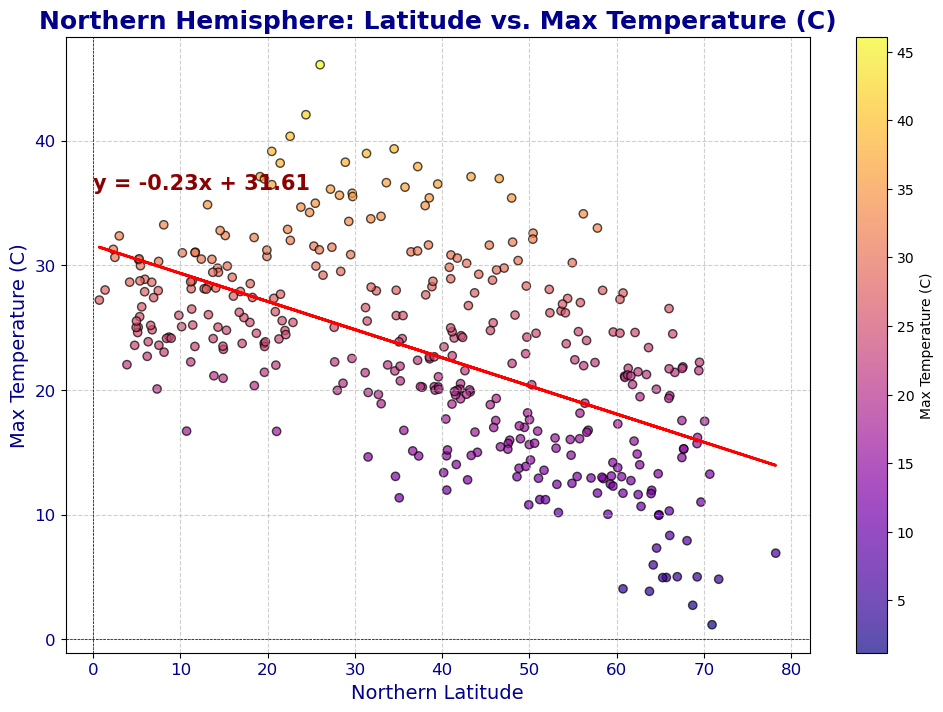

The r-value is: -0.56


In [87]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7, c=y_values, cmap='plasma', marker='o')
plt.plot(x_values, regress_values, "r-", linewidth=2)
plt.annotate(line_eq, (0, y_values.max() - 10), fontsize=15, color="darkred", fontweight='bold')

plt.title('Northern Hemisphere: Latitude vs. Max Temperature (C)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Northern Latitude', fontsize=14, color='darkblue')
plt.ylabel('Max Temperature (C)', fontsize=14, color='darkblue')
plt.colorbar(scatter, label='Max Temperature (C)')
plt.grid(True, linestyle='--', alpha=0.6)

# Enhance plot aesthetics
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Save the figure
plt.savefig("output_data/Fig10.png", bbox_inches='tight')

# Show plot
plt.show()

print(f"The r-value is: {rvalue:.2f}")


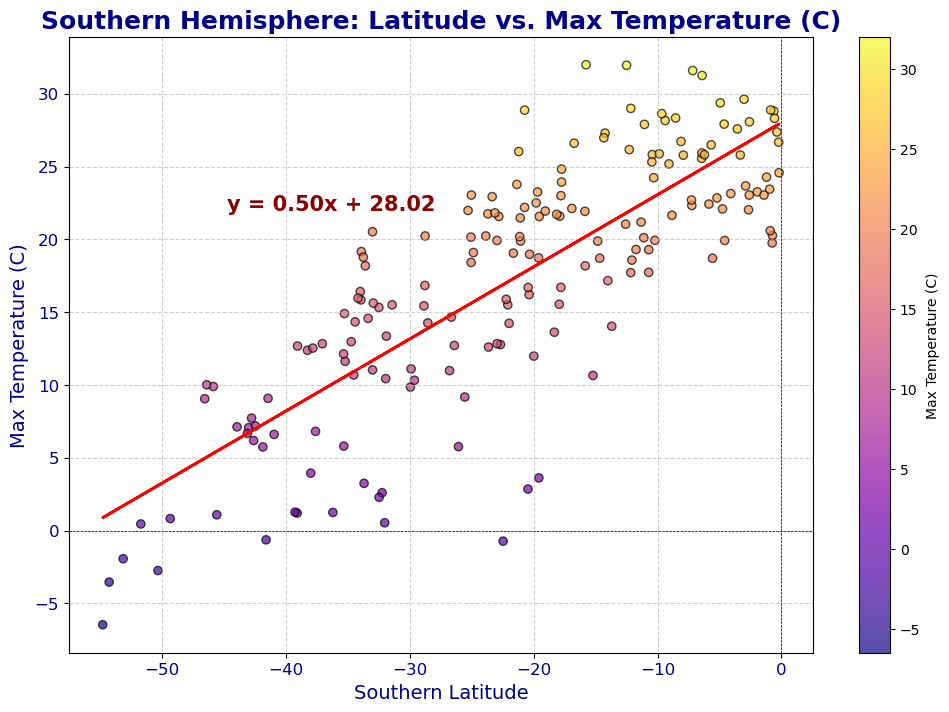

The r-value is: 0.81


In [88]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7, c=y_values, cmap='plasma', marker='o')
plt.plot(x_values, regress_values, "r-", linewidth=2)
plt.annotate(line_eq, (x_values.min() + 10, y_values.max() - 10), fontsize=15, color="darkred", fontweight='bold')

plt.title('Southern Hemisphere: Latitude vs. Max Temperature (C)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Southern Latitude', fontsize=14, color='darkblue')
plt.ylabel('Max Temperature (C)', fontsize=14, color='darkblue')
plt.colorbar(scatter, label='Max Temperature (C)')
plt.grid(True, linestyle='--', alpha=0.6)

# Enhance plot aesthetics
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Save the figure
plt.savefig("output_data/Fig11.png", bbox_inches='tight')

# Show plot
plt.show()

print(f"The r-value is: {rvalue:.2f}")




**Discussion about the linear relationship:** YOUR RESPONSE HERE
 Northern Hemisphere: Latitude vs. Max Temperature

The r-value is: -0.56
The negative r-value of -0.56 in the Northern Hemisphere suggests a moderate inverse relationship between latitude and maximum temperature. This means that the maximum temperature tends to decrease as the latitude increases (moving away from the equator towards the poles).

Southern Hemisphere: Latitude vs. Max Temperature
The r-value is: 0.81
The positive r-value of 0.81 in the Southern Hemisphere indicates a strong direct relationship between latitude and maximum temperature. This implies that the maximum temperature also increases as the latitude increases (moving towards the equator).


### Humidity vs. Latitude Linear Regression Plot

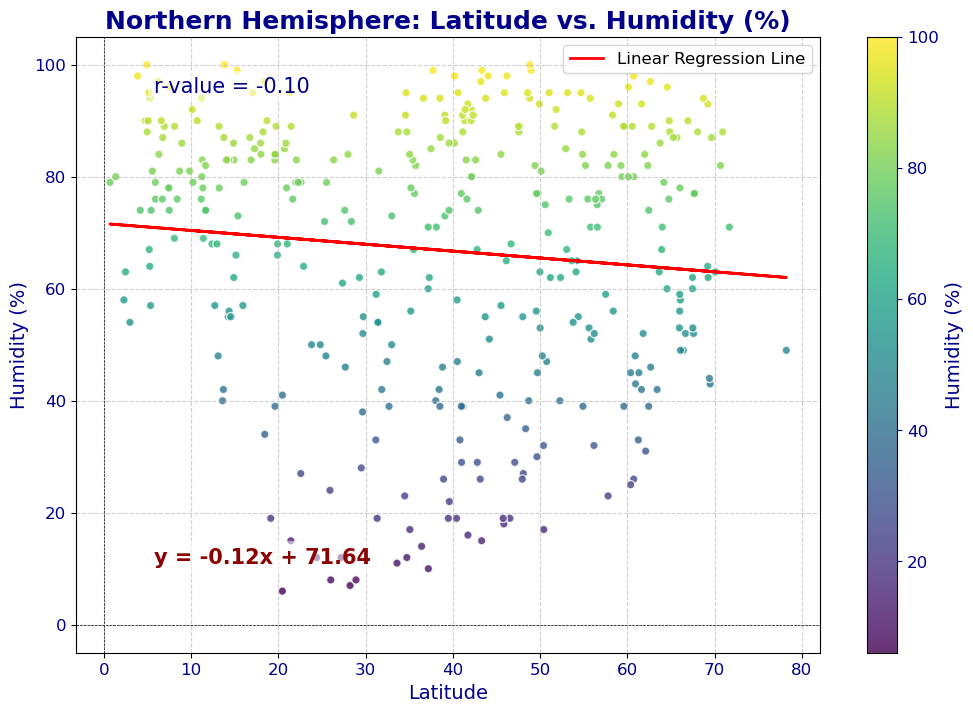

The r-value is: -0.10


In [89]:
# Northern Hemisphere
# YOUR CODE HERE

# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plotting
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_values, y_values, edgecolors='w', alpha=0.8, c=y_values, cmap='viridis', marker='o')
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Linear Regression Line')

# Annotate the linear equation on the plot
plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="darkred", fontweight='bold', 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Enhancing plot aesthetics
plt.title('Northern Hemisphere: Latitude vs. Humidity (%)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Latitude', fontsize=14, color='darkblue')
plt.ylabel('Humidity (%)', fontsize=14, color='darkblue')
cbar = plt.colorbar(scatter)
cbar.set_label('Humidity (%)', fontsize=14, color='darkblue')
cbar.ax.tick_params(labelsize=12, colors='darkblue')
plt.grid(True, linestyle='--', alpha=0.6)

# Adding axis lines for reference
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Setting font sizes and colors for ticks
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Adding legend
plt.legend(loc='best', fontsize=12)

# Adding text box for r-value
plt.text(min(x_values) + 5, max(y_values) - 5, f'r-value = {rvalue:.2f}', fontsize=15, color="darkblue", 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Lat_vs_Humidity.png", bbox_inches='tight')

# Show plot
plt.show()

print(f"The r-value is: {rvalue:.2f}")

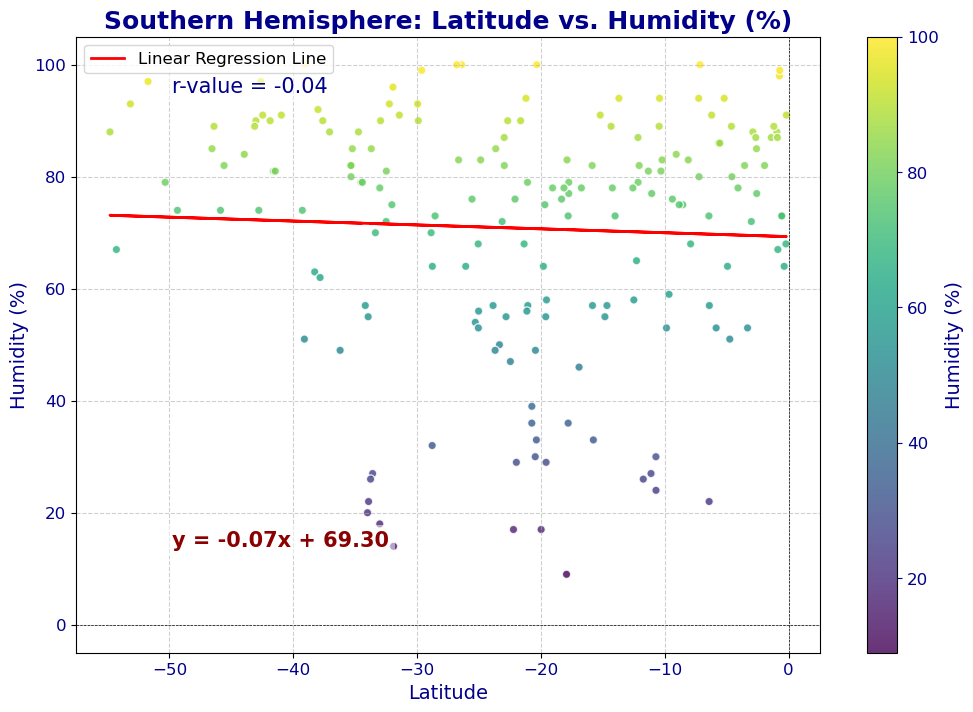

The r-value is: -0.04


In [90]:

# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plotting
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_values, y_values, edgecolors='w', alpha=0.8, c=y_values, cmap='viridis', marker='o')
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Linear Regression Line')

# Annotate the linear equation on the plot
plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="darkred", fontweight='bold', 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Enhancing plot aesthetics
plt.title('Southern Hemisphere: Latitude vs. Humidity (%)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Latitude', fontsize=14, color='darkblue')
plt.ylabel('Humidity (%)', fontsize=14, color='darkblue')
cbar = plt.colorbar(scatter)
cbar.set_label('Humidity (%)', fontsize=14, color='darkblue')
cbar.ax.tick_params(labelsize=12, colors='darkblue')
plt.grid(True, linestyle='--', alpha=0.6)

# Adding axis lines for reference
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Setting font sizes and colors for ticks
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Adding legend
plt.legend(loc='best', fontsize=12)

# Adding text box for r-value
plt.text(min(x_values) + 5, max(y_values) - 5, f'r-value = {rvalue:.2f}', fontsize=15, color="darkblue", 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Lat_vs_Humidity.png", bbox_inches='tight')

# Show plot
plt.show()

print(f"The r-value is: {rvalue:.2f}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

 Northern Hemisphere: Latitude vs. Humidity

The r-value is: -0.10
 In the Northern Hemisphere, the r-value of -0.10 suggests a weak negative correlation between latitude and humidity. This implies almost no linear relationship between the latitude and humidity in the Northern Hemisphere. 

Southern Hemisphere: Latitude vs. Humidity

The r-value is: -0.04
Similarly, the Southern Hemisphere's r-value of -0.04 indicates an even weaker negative correlation between latitude and humidity. This extremely low r-value suggests that the Southern Hemisphere has no linear relationship between latitude and humidity.


### Cloudiness vs. Latitude Linear Regression Plot

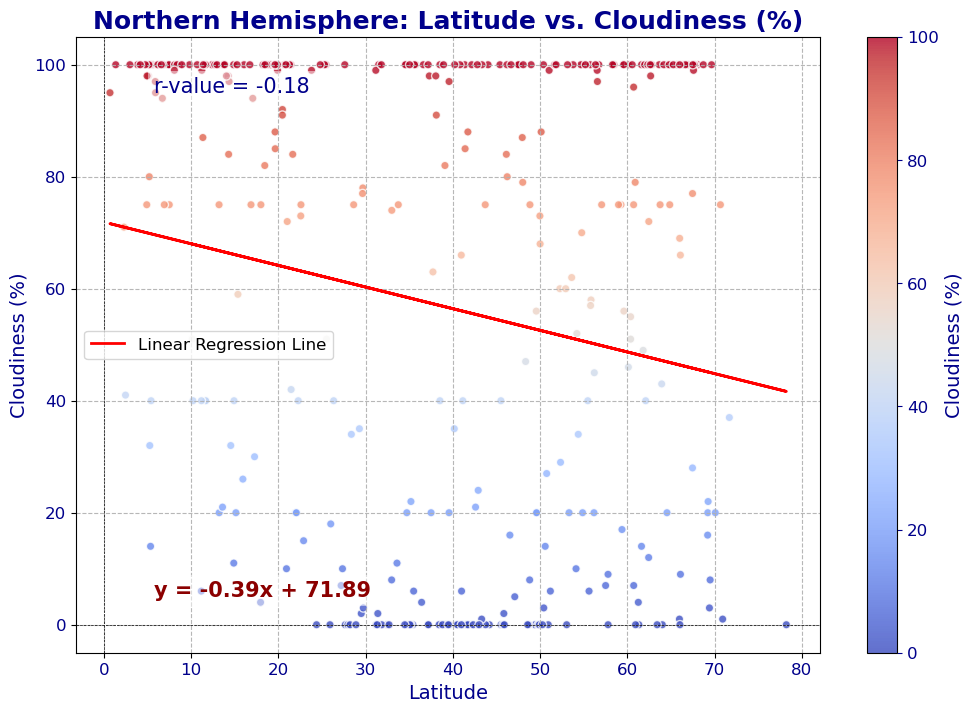

The r-value is: -0.18


In [91]:
# Northern Hemisphere
# YOUR CODE HERE

# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plotting
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_values, y_values, edgecolors='w', alpha=0.8, c=y_values, cmap='coolwarm', marker='o')
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Linear Regression Line')

# Annotate the linear equation on the plot
plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="darkred", fontweight='bold', 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Enhancing plot aesthetics
plt.title('Northern Hemisphere: Latitude vs. Cloudiness (%)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Latitude', fontsize=14, color='darkblue')
plt.ylabel('Cloudiness (%)', fontsize=14, color='darkblue')
cbar = plt.colorbar(scatter)
cbar.set_label('Cloudiness (%)', fontsize=14, color='darkblue')
cbar.ax.tick_params(labelsize=12, colors='darkblue')
plt.grid(True, linestyle='--', alpha=0.9)

# Adding axis lines for reference
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Setting font sizes and colors for ticks
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Adding legend
plt.legend(loc='best', fontsize=12)

# Adding text box for r-value
plt.text(min(x_values) + 5, max(y_values) - 5, f'r-value = {rvalue:.2f}', fontsize=15, color="darkblue", 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Lat_vs_Cloudiness.png", bbox_inches='tight')

# Show plot
plt.show()

print(f"The r-value is: {rvalue:.2f}")

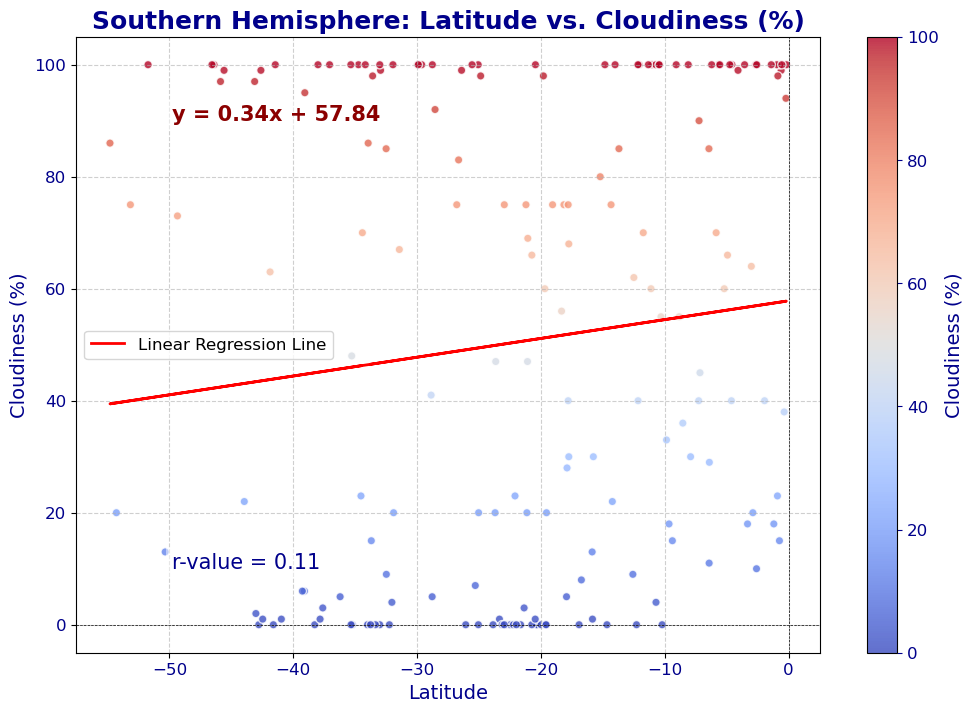

The r-value is: 0.11


In [92]:
# Southern Hemisphere
# YOUR CODE HERE

# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plotting
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_values, y_values, edgecolors='w', alpha=0.8, c=y_values, cmap='coolwarm', marker='o')
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Linear Regression Line')

# Annotate the linear equation on the plot
plt.annotate(line_eq, (min(x_values) + 5, max(y_values) - 10), fontsize=15, color="darkred", fontweight='bold', 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Enhancing plot aesthetics
plt.title('Southern Hemisphere: Latitude vs. Cloudiness (%)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Latitude', fontsize=14, color='darkblue')
plt.ylabel('Cloudiness (%)', fontsize=14, color='darkblue')
cbar = plt.colorbar(scatter)
cbar.set_label('Cloudiness (%)', fontsize=14, color='darkblue')
cbar.ax.tick_params(labelsize=12, colors='darkblue')
plt.grid(True, linestyle='--', alpha=0.6)

# Adding axis lines for reference
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Setting font sizes and colors for ticks
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Adding legend
plt.legend(loc='best', fontsize=12)

# Adding text box for r-value
plt.text(min(x_values) + 5, min(y_values) + 10, f'r-value = {rvalue:.2f}', fontsize=15, color="darkblue", 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Lat_vs_Cloudiness.png", bbox_inches='tight')

# Show plot
plt.show()

print(f"The r-value is: {rvalue:.2f}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

 Northern Hemisphere: Latitude vs. Cloudiness

 The r-value is: -0.18
 In the Northern Hemisphere, the r-value of -0.18 suggests a weak negative correlation between latitude and cloudiness. This means that cloudiness decreases slightly as the latitude increases (moving away from the equator towards the poles). However, the correlation is weak.


 Southern Hemisphere: Latitude vs. Cloudiness

 The r-value is: 0.11
 In the Southern Hemisphere, the r-value of 0.11 indicates a very weak positive correlation between latitude and cloudiness. This suggests that cloudiness tends to increase slightly as the latitude increases (moving towards the equator). Like the Northern Hemisphere, this weak correlation implies that latitude is not a major determinant of cloudiness. 


### Wind Speed vs. Latitude Linear Regression Plot

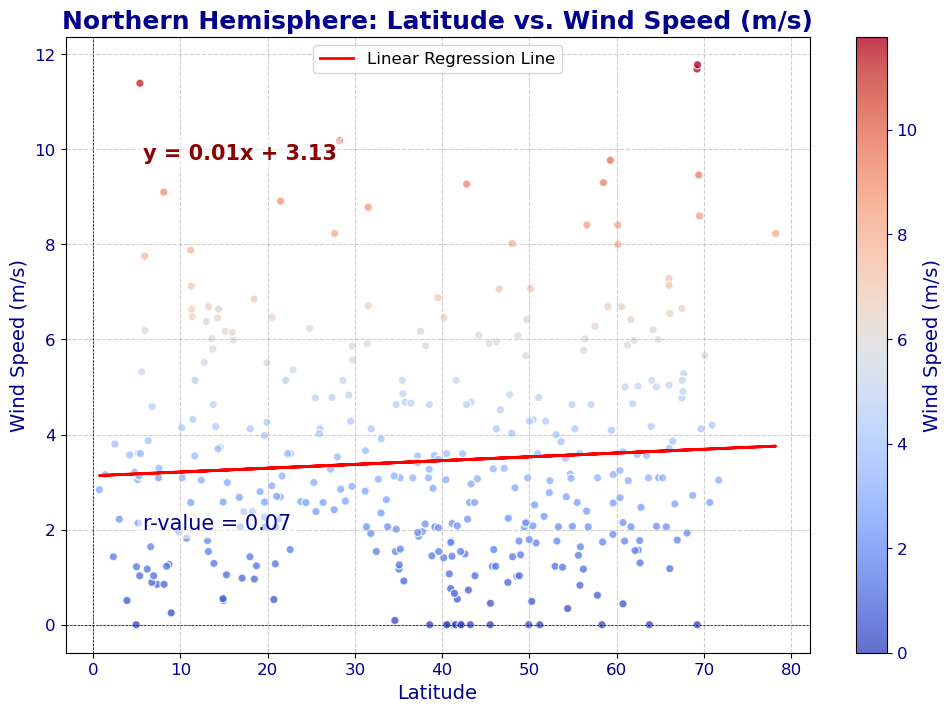


Linear Regression Analysis for Northern Hemisphere: Latitude vs. Wind Speed
----------------------------------------------------------------------
The r-value is: 0.07



In [93]:
# Northern Hemisphere
# YOUR CODE HERE

# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plotting
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_values, y_values, edgecolors='w', alpha=0.8, c=y_values, cmap='coolwarm', marker='o')
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Linear Regression Line')

# Annotate the linear equation on the plot
plt.annotate(line_eq, (min(x_values) + 5, max(y_values) - 2), fontsize=15, color="darkred", fontweight='bold', 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Enhancing plot aesthetics
plt.title('Northern Hemisphere: Latitude vs. Wind Speed (m/s)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Latitude', fontsize=14, color='darkblue')
plt.ylabel('Wind Speed (m/s)', fontsize=14, color='darkblue')
cbar = plt.colorbar(scatter)
cbar.set_label('Wind Speed (m/s)', fontsize=14, color='darkblue')
cbar.ax.tick_params(labelsize=12, colors='darkblue')
plt.grid(True, linestyle='--', alpha=0.6)

# Adding axis lines for reference
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Setting font sizes and colors for ticks
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Adding legend
plt.legend(loc='best', fontsize=12)

# Adding text box for r-value
plt.text(min(x_values) + 5, min(y_values) + 2, f'r-value = {rvalue:.2f}', fontsize=15, color="darkblue", 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Lat_vs_Wind_Speed.png", bbox_inches='tight')

# Show plot
plt.show()

# Print the r-value in a prettier format
print(f"\nLinear Regression Analysis for Northern Hemisphere: Latitude vs. Wind Speed\n{'-'*70}\nThe r-value is: {rvalue:.2f}\n")


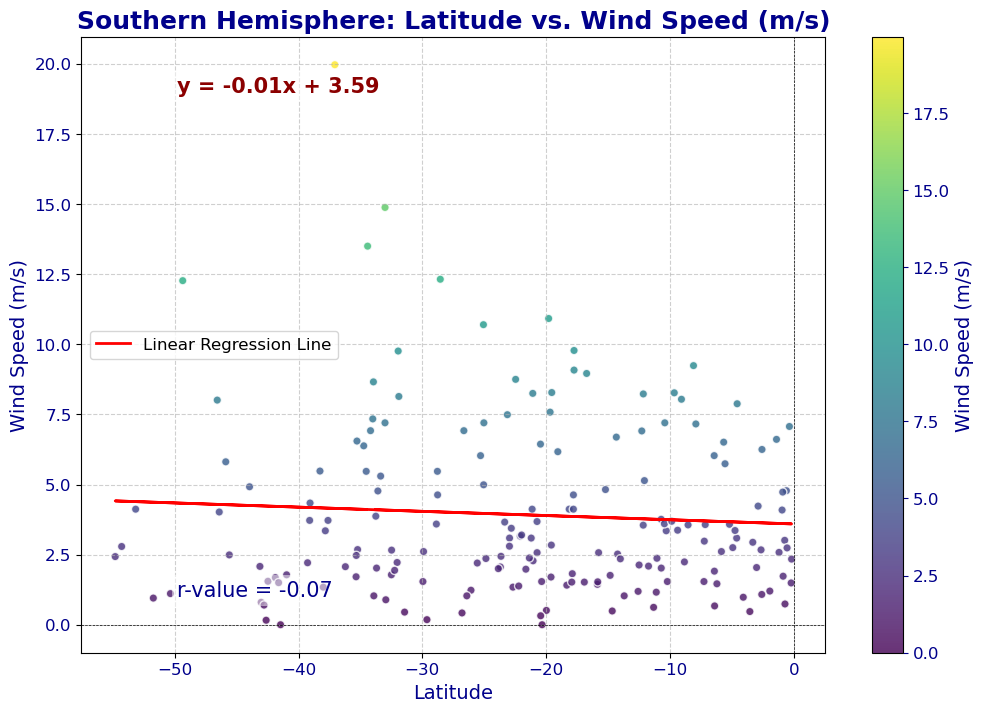


Linear Regression Analysis for Southern Hemisphere: Latitude vs. Wind Speed
----------------------------------------------------------------------
The r-value is: -0.07



In [94]:
# Southern Hemisphere
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Assuming southern_hemi_df is already defined and contains the required data
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plotting
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_values, y_values, edgecolors='w', alpha=0.8, c=y_values, cmap='viridis', marker='o')
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Linear Regression Line')

# Annotate the linear equation on the plot
plt.annotate(line_eq, (min(x_values) + 5, max(y_values) - 1), fontsize=15, color="darkred", fontweight='bold', 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Enhancing plot aesthetics
plt.title('Southern Hemisphere: Latitude vs. Wind Speed (m/s)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Latitude', fontsize=14, color='darkblue')
plt.ylabel('Wind Speed (m/s)', fontsize=14, color='darkblue')
cbar = plt.colorbar(scatter)
cbar.set_label('Wind Speed (m/s)', fontsize=14, color='darkblue')
cbar.ax.tick_params(labelsize=12, colors='darkblue')
plt.grid(True, linestyle='--', alpha=0.6)

# Adding axis lines for reference
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Setting font sizes and colors for ticks
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Adding legend
plt.legend(loc='best', fontsize=12)

# Adding text box for r-value
plt.text(min(x_values) + 5, min(y_values) + 1, f'r-value = {rvalue:.2f}', fontsize=15, color="darkblue", 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Lat_vs_Wind_Speed.png", bbox_inches='tight')

# Show plot
plt.show()

# Print the r-value in a prettier format
print(f"\nLinear Regression Analysis for Southern Hemisphere: Latitude vs. Wind Speed\n{'-'*70}\nThe r-value is: {rvalue:.2f}\n")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Linear Regression Analysis for Southern Hemisphere: Latitude vs. Wind Speed
The r-value is: -0.07
In the Southern Hemisphere, the r-value of -0.07 indicates an extremely weak negative correlation between latitude and wind speed. This suggests that as the latitude increases (moving closer to the equator), there is a very slight tendency for wind speed to decrease. However, the correlation is so weak that it implies latitude alone has little to no effect on wind speed. 

Linear Regression Analysis for Northern Hemisphere: Latitude vs. Wind Speed
The r-value is: 0.07
In the Northern Hemisphere, the r-value of 0.07 indicates an extremely weak positive correlation between latitude and wind speed. This suggests that as the latitude increases (moving away from the equator towards the poles), there is a very slight tendency for wind speed to increase.